In [1]:
import pandas as pd
import numpy as np


In [2]:
df= pd.read_excel("superstore.xlsx")
df.to_json('ss.json')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06 00:00:00,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df["Order Date"]= pd.to_datetime(df['Order Date'])
df["Ship Date"]= pd.to_datetime(df['Ship Date'])
df["year"]= df["Order Date"].dt.year
df["month"]=df['Order Date'].dt.to_period('M').astype(str)
df["profit margin"]= df["Profit"]/df["Sales"]
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year,month,profit margin
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,2016-08,0.1600
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,2016-08,0.3000
2,3,CA-2016-138688,2016-12-06,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,2016-12,0.4700
3,4,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,2015-11,-0.4000
4,5,US-2015-108966,2015-11-10,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,2015-11,0.1125


In [4]:
total_sales= df['Sales'].sum()
total_profit= df["Profit"].sum()
margin= total_profit/total_sales
num_order= df['Order ID'].nunique()
avg_order_value= total_sales/num_order
print(total_sales,total_profit,margin,num_order,avg_order_value)

2297200.8603000003 286397.0217 0.12467217240315603 5009 458.61466566180883


In [5]:
kpi= pd.DataFrame({
    "kpi":[
         "Total Sales",
        "Total Profit",
        "Overall Profit Margin",
        "Number of Orders",
        "Average Order Value"
    ],
    "values":[
          total_sales,
        total_profit,
        margin,
        num_order,
        avg_order_value
    ]
})
print(total_sales)
print('\n key kpis:')
print(kpi)

2297200.8603000003

 key kpis:
                     kpi        values
0            Total Sales  2.297201e+06
1           Total Profit  2.863970e+05
2  Overall Profit Margin  1.246722e-01
3       Number of Orders  5.009000e+03
4    Average Order Value  4.586147e+02


In [6]:
monthly = df.groupby("month").agg({
    "Sales":"sum",
    "Profit":"sum"
}).reset_index()

monthly["month_dt"]= pd.to_datetime(monthly["month"]+"-1")
monthly= monthly.sort_values("month_dt")
print(monthly)

      month       Sales      Profit   month_dt
0   2014-01  28953.7060   4549.4546 2014-01-01
1   2014-02  12743.1080   2654.5569 2014-02-01
2   2014-03  54801.9060     92.6990 2014-03-01
3   2014-04  24710.0160   4601.0714 2014-04-01
4   2014-05  29639.8340   3912.2499 2014-05-01
5   2014-06  29287.0306   4499.7446 2014-06-01
6   2014-07  35341.2460  -1783.5425 2014-07-01
7   2014-08  37854.5475   2081.2676 2014-08-01
8   2014-09  66110.2238  10232.2626 2014-09-01
9   2014-10  34561.9470   4075.1499 2014-10-01
10  2014-11  64817.6185   6653.2762 2014-11-01
11  2014-12  65426.3147   7975.7839 2014-12-01
12  2015-01  29347.3864   1237.0630 2015-01-01
13  2015-02  20728.3520   2171.4036 2015-02-01
14  2015-03  40876.6112   9165.6802 2015-03-01
15  2015-04  38056.9685   6132.8819 2015-04-01
16  2015-05  30933.7145   2779.3998 2015-05-01
17  2015-06  28862.1982   4788.4461 2015-06-01
18  2015-07  28730.3760    671.7960 2015-07-01
19  2015-08  50094.5280  10112.2771 2015-08-01
20  2015-09  

In [7]:
top_products= df.groupby('Product Name').agg({
    "Sales":"sum",
    "Profit":"sum",
    "Quantity":"sum"
}).sort_values("Sales",ascending=False).head(10)
top_products.head(10)

,Sales,Profit,Quantity
Product Name,,,
Canon imageCLASS 2200 Advanced Copier,61599.824,2.519993e+04,20
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,27453.384,7.753039e+03,31
Cisco TelePresence System EX90 Videoconferencing Unit,22638.480,-1.811078e+03,6
HON 5400 Series Task Chairs for Big and Tall,21870.576,5.684342e-14,39
GBC DocuBind TL300 Electric Binding System,19823.479,2.233505e+03,37
GBC Ibimaster 500 Manual ProClick Binding System,19024.500,7.609800e+02,48
Hewlett Packard LaserJet 3310 Copier,18839.686,6.983884e+03,38
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895,4.094977e+03,12
GBC DocuBind P400 Electric Binding System,17965.068,-1.878166e+03,27


In [8]:
region_summary=df.groupby('Region').agg({
    "Sales":"sum",
    "Profit":"sum",
    "Order ID":"count"
}).rename(columns={"Order ID": "orders"})

region_summary["profit margin"]= region_summary["Profit"]/ region_summary["Sales"]
print(region_summary)

               Sales       Profit  orders  profit margin
Region                                                  
Central  501239.8908   39706.3625    2323       0.079216
East     678781.2400   91522.7800    2848       0.134834
South    391721.9050   46749.4303    1620       0.119343
West     725457.8245  108418.4489    3203       0.149448


In [9]:
segments= df.groupby(["Category","Region"]).agg({
    "Profit": "sum",
    "Sales":"sum"
}).reset_index()

unprofit_segment= segments[segments["Profit"]<0]
print(unprofit_segment)

    Category   Region     Profit        Sales
0  Furniture  Central -2871.0494  163797.1638


**Visualization**

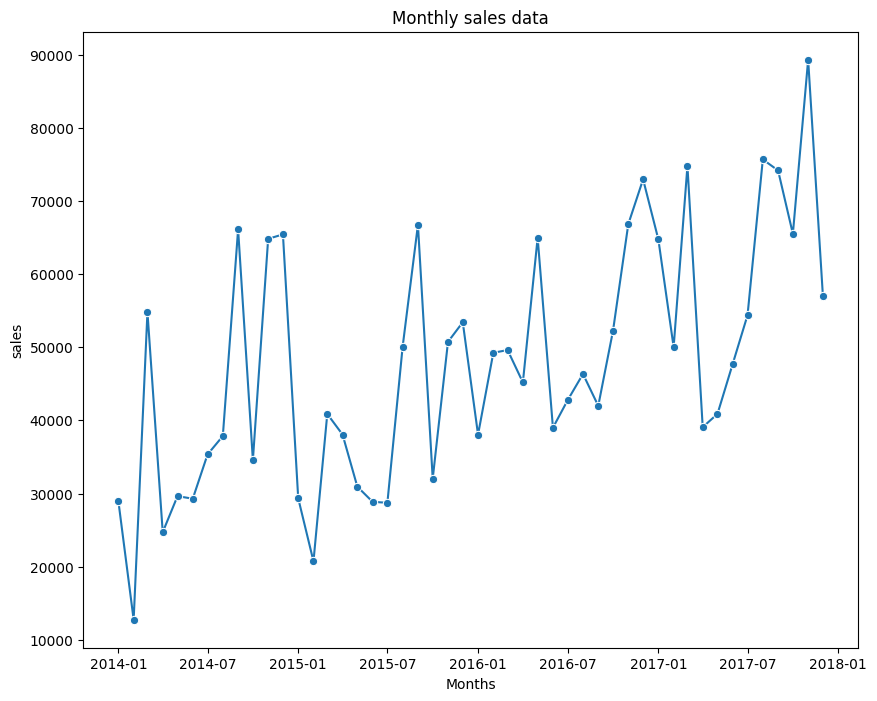

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.lineplot(data=monthly, x="month_dt", y="Sales", marker="o" )
plt.title("Monthly sales data")
plt.xlabel("Months")
plt.ylabel("sales")
plt.show()




/tmp/ipython-input-2812771827.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products["Sales"],palette=colours)
/tmp/ipython-input-2812771827.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


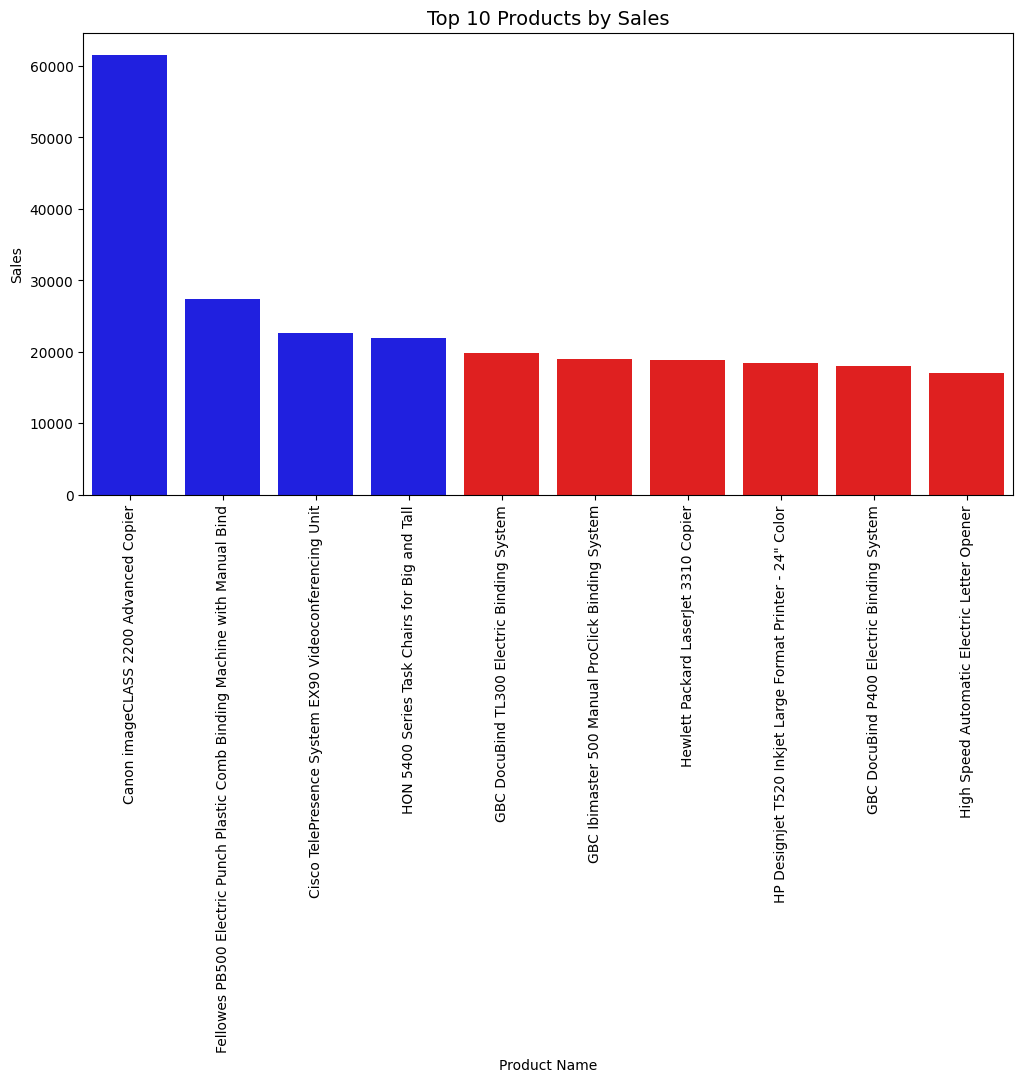

In [23]:
plt.figure(figsize=(12,6))
colours = ["red" if x < 20000 else "blue" for x in top_products["Sales"]]

sns.barplot(x=top_products.index, y=top_products["Sales"],palette=colours)
plt.title("Top 10 Products by Sales", fontsize=14)
plt.xlabel("Product Name")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


/tmp/ipython-input-237425151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_summary.index, y=region_summary["Sales"], palette="magma")


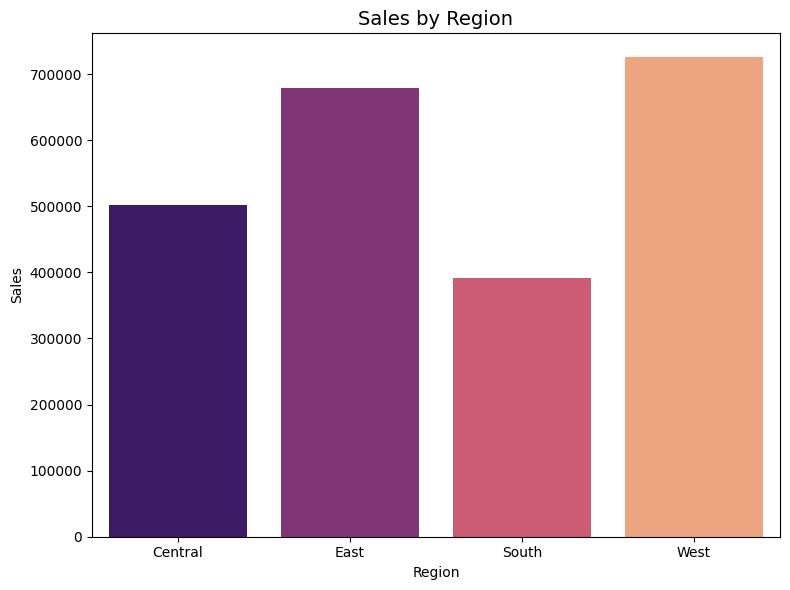

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(x=region_summary.index, y=region_summary["Sales"], palette="magma")
plt.title("Sales by Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


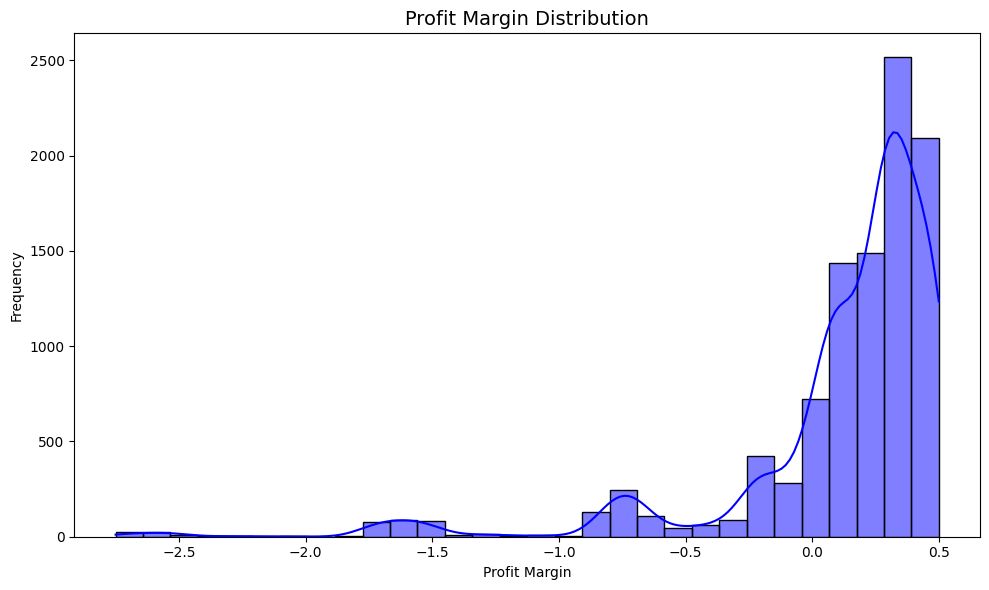

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(df["profit margin"].dropna(), bins=30, kde=True, color="blue")
plt.title("Profit Margin Distribution", fontsize=14)
plt.xlabel("Profit Margin")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()